In [1]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

Using TensorFlow backend.


In [2]:
import tensorflow

# CNN

In [2]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Initialising CNN
classifier = Sequential()

#Adding Convolution Layer 1
classifier.add(Convolution2D(32,3,3,
                             input_shape=(128,128,3),
                             activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

#Adding Convolution Layer 2
classifier.add(Convolution2D(20,3,3,
                             activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

#Adding Convolution Layer 3
classifier.add(Convolution2D(12,3,3,
                             activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

#Adding Convolution Layer 4
classifier.add(Convolution2D(8,3,3,
                             activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

#Flatten
classifier.add(Flatten())

#Full Connection
classifier.add(Dense(output_dim=128,activation='relu'))
classifier.add(Dense(output_dim=1,activation='sigmoid'))

#compile
classifier.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

/Users/constant/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,..., activation="relu")`
  app.launch_new_instance()
/Users/constant/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
/Users/constant/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
/Users/constant/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
/Users/constant/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
/Users/constant/anaconda3/lib/python3.7/site-packages/

In [3]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 20)        5780      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 12)        2172      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 12)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 8)        

In [4]:
from PIL import Image

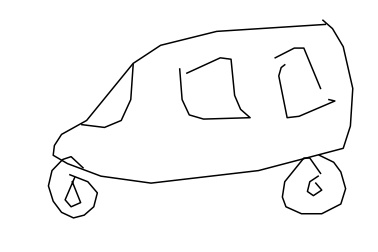

In [5]:
Image.open('./data/train/car/10001.jpg')

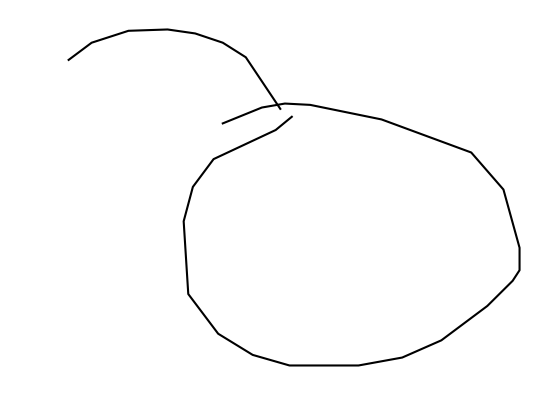

In [6]:
Image.open('./data/train/not_car/apple_100.jpg')

In [7]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_size = (128,128)
batch_size_chosen = 32

train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    zoom_range=0.2,
                                    rotation_range = 15,
                                    horizontal_flip=True)


train_generator = train_datagen.flow_from_directory(
                                                    'data/train',
                                                    target_size=image_size,
                                                    batch_size=batch_size_chosen,
                                                    class_mode='binary')


test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
                                                        'data/test',
                                                        target_size=image_size,
                                                        batch_size=batch_size_chosen,
                                                        class_mode='binary')

Found 47768 images belonging to 2 classes.
Found 23885 images belonging to 2 classes.


In [19]:
train_generator.class_indices

{'car': 0, 'not_car': 1}

In [9]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model_chekpointing = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10)

classifier.fit_generator(train_generator,
                        epochs=5,
                        steps_per_epoch=100,
                        validation_data=validation_generator,
                        workers=4,
                        callbacks=[early_stopping, model_chekpointing])

Epoch 1/5
100/100 [==============================] - 80s 801ms/step - loss: 0.2949 - accuracy: 0.8803 - val_loss: 0.1547 - val_accuracy: 0.8615
Epoch 2/5
100/100 [==============================] - 81s 805ms/step - loss: 0.2537 - accuracy: 0.8944 - val_loss: 0.3614 - val_accuracy: 0.8873
Epoch 3/5
100/100 [==============================] - 78s 780ms/step - loss: 0.2768 - accuracy: 0.8897 - val_loss: 0.1299 - val_accuracy: 0.8872
Epoch 4/5
100/100 [==============================] - 83s 827ms/step - loss: 0.2454 - accuracy: 0.9106 - val_loss: 1.0873 - val_accuracy: 0.9106
Epoch 5/5
100/100 [==============================] - 80s 800ms/step - loss: 0.2334 - accuracy: 0.9094 - val_loss: 0.3091 - val_accuracy: 0.9125


In [46]:
from keras.applications.inception_v3 import InceptionV3

pretrained_model = keras.applications.inception_v3.InceptionV3(input_shape=[128,128, 3], include_top=False)
pretrained_model.trainable = False

model_inception = Sequential([
    pretrained_model,
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_inception.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [49]:
model_chekpointing_inception = ModelCheckpoint('best_model_inception.h5', 
                                               monitor='val_accuracy',
                                               mode='max', 
                                               save_best_only=True)

early_stopping_inception = EarlyStopping(monitor='val_accuracy', patience=10)

model.fit_generator(train_generator,
                    epochs=5,
                    steps_per_epoch=100,
                    validation_data=validation_generator,
                    workers=4,
                    callbacks=[model_chekpointing_inception, early_stopping_inception]
                    )

Epoch 1/5
100/100 [==============================] - 81s 812ms/step - loss: 0.2326 - accuracy: 0.9091 - val_loss: 1.1074 - val_accuracy: 0.9084
Epoch 2/5
100/100 [==============================] - 80s 798ms/step - loss: 0.2335 - accuracy: 0.9144 - val_loss: 0.2634 - val_accuracy: 0.8956
Epoch 3/5
100/100 [==============================] - 86s 863ms/step - loss: 0.2018 - accuracy: 0.9262 - val_loss: 0.4597 - val_accuracy: 0.8960
Epoch 4/5
100/100 [==============================] - 86s 859ms/step - loss: 0.2245 - accuracy: 0.9153 - val_loss: 0.3990 - val_accuracy: 0.9176
Epoch 5/5
100/100 [==============================] - 86s 859ms/step - loss: 0.1966 - accuracy: 0.9275 - val_loss: 0.0321 - val_accuracy: 0.9061


In [21]:
from keras.models import load_model

In [22]:
model = load_model('best_model.h5')

In [23]:
car = np.array(Image.open('./data/test/car/1000.jpg').convert('RGB').resize((128,128))).reshape(1,128,128,3)*1/255

In [44]:
model.predict_classes(car)

array([[0]], dtype=int32)

In [43]:
not_car = np.array(Image.open('./data/test/not_car/snowman_10.jpg').convert('RGB').resize((128,128))).reshape(1,128,128,3)*1/255

In [45]:
model.predict_classes(not_car)

array([[1]], dtype=int32)